In [103]:
from mfer import mfer

import matplotlib.pyplot as plt

import random

%matplotlib inline

In [2]:
path = '/mnt/ext/ExperimentData/2018-05-02/14FullDisclosure.mwf'

In [3]:
mf = mfer(path)

endian:1
time:2017-04-27 16:53:10
sampling_rate:125.0
sampling_resolution:9.803e-06
type:0
len_block:3750
num_channel:3
num_sequence:1
... param load done
... waveform load done


In [4]:
mf.data.shape[0]/(125*60*60)

24.116666666666667

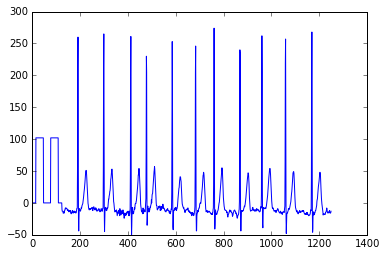

In [5]:
plt.plot(mf.data[:125*10,0])

In [89]:
import numpy as np
signal = mf.data.astype(np.float64) * mf.param["sampling_resolution"] * 10e3

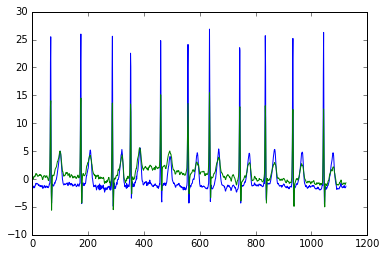

In [90]:
plt.plot(signal[125*1:125*10,0])
plt.plot(signal[125*1:125*10,1])

## Extract beats manually

In [91]:
signal[:,0].max(), signal[:,0].min()

(44.60365, -34.21247)

In [92]:
signal[:,1].max(), signal[:,1].min()

(50.09333, -50.19136)

In [93]:
from scipy import interpolate
from scipy import signal as sg

(20, 300)

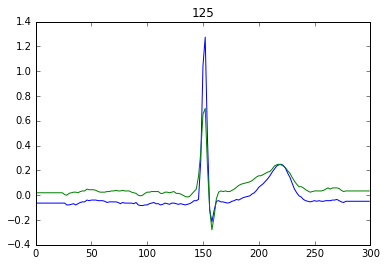

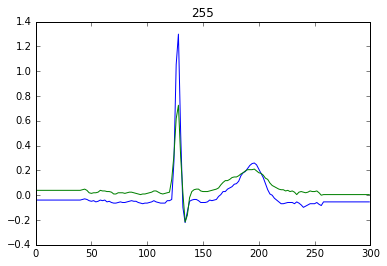

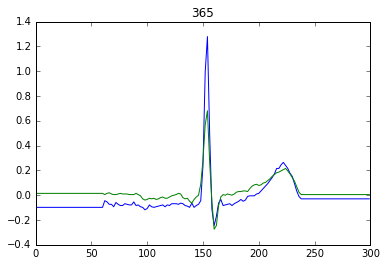

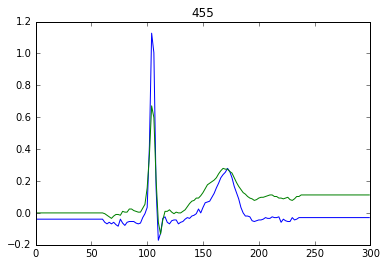

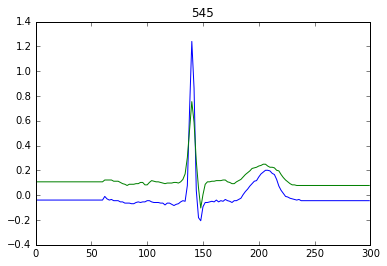

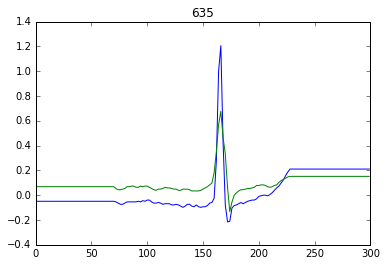

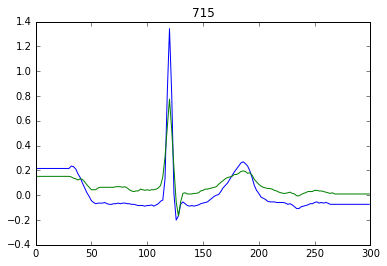

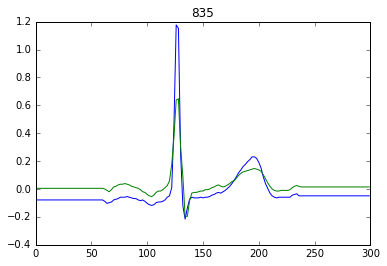

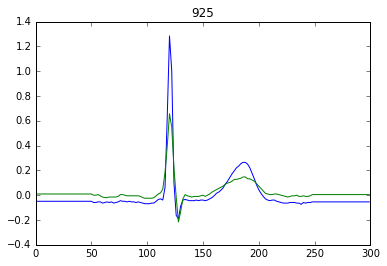

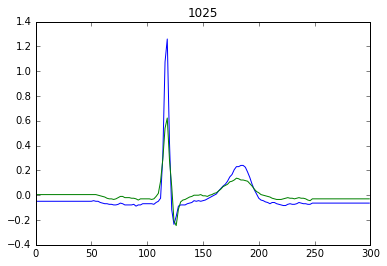

In [111]:
beat_cut = np.array([0, 130, 240, 330, 420, 510, 590, 710, 800, 900, 1000], dtype=np.uint16) +125

X = np.zeros((1,300), dtype=np.float32)

for i, c in enumerate(beat_cut[:-1]):
    #plt.subplot(len(beat_cut)-1, 1, i+1)
    fig = plt.figure()
    plt.title( str(c) )
    for ch in range(2):
        S = signal[c:beat_cut[i+1],ch]
        L = len(S)
        x = np.arange(0,L,1)
        x*=2
        f = interpolate.interp1d(x, S)
        x_new = np.arange(0,2*L-1,1)
        
        S_new = f(x_new)
        S_new /= 20.0
        
        offset = (300 - len(S_new))//2
        #offset = random.randint(0, w)

        S_ = np.zeros((1,300), dtype=S_new.dtype)
        S_[0,:offset] = S_new[0]
        S_[0,offset:offset+len(S_new)] = S_new
        S_[0,offset+len(S_new):] = S_new[-1]
        
        S_ = S_ - sg.medfilt(sg.medfilt(S_, 125),125)
        
        X = np.concatenate((X, S_), axis=0)
         
        plt.plot(S_[0,:])
        
X = X[1:,:]
X.shape

In [106]:
np.save("mfer_sample", X)